In [12]:
import json
import ROOT
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Abrir el archivo JSON en modo lectura
with open('dataWCD.json') as file:
    # Cargar el contenido del archivo JSON
    data = json.load(file)

# Mostrar la estructura del archivo JSON en partes
print("Estructura del archivo JSON:")
print("--------------------------------")

# Mostrar las claves del archivo JSON
print("Claves del archivo JSON:")
print("-------------------------")
for key in data.keys():
    print(key)

Estructura del archivo JSON:
--------------------------------
Claves del archivo JSON:
-------------------------
Detector_0
InputFlux
OptDevice_0


In [3]:
valor_Detector_0 = data['Detector_0']
valor_input_flux = data['InputFlux']
valor_opt_device_0 = data['OptDevice_0']

In [4]:
if 'Detector_0' in data:
    # Convertir el contenido de 'Detector_0' a formato JSON y mostrarlo
    detector_0_data = data['Detector_0']
    #print(json.dumps(detector_0_data, indent=4))
else:
    print("'Detector_0' no está presente en el archivo JSON.")


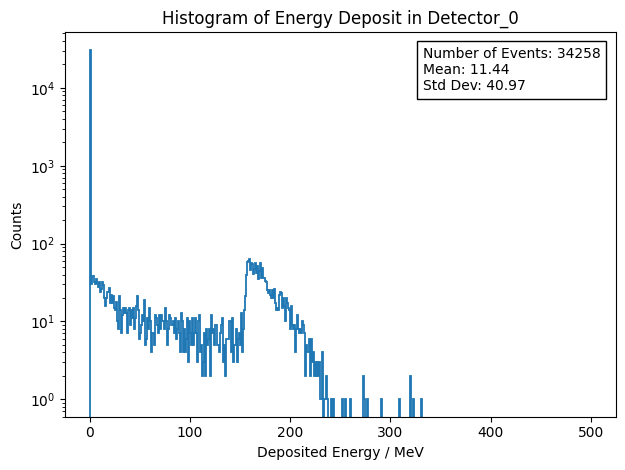

In [19]:


if 'Detector_0' in data:
    # Obtener los valores de energía depositada en 'Detector_0'
    detector_0_data = data['Detector_0']
    energy_deposits = detector_0_data['EnergyDeposit']
 
    # Crear el histograma
    hist, bin_edges = np.histogram(energy_deposits, bins=500, range=(0, 500))
    # Calcular estadísticas
    num_events = len(energy_deposits)
    mean = np.mean(energy_deposits)
    std_dev = np.std(energy_deposits)

    # Configurar el gráfico
    fig, ax = plt.subplots()
    ax.hist(energy_deposits, bins=500, range=(0, 500), histtype='step', linewidth=1.3)
    ax.set_xlabel('Deposited Energy / MeV')
    ax.set_ylabel('Counts')
    ax.set_title('Histogram of Energy Deposit in Detector_0')
    plt.yscale('log')  # Establecer escala logarítmica en el eje Y
   

    # Mostrar estadísticas en el gráfico
    text = f"Number of Events: {num_events}\nMean: {mean:.2f}\nStd Dev: {std_dev:.2f}"
    plt.text(0.65, 0.85, text, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))

    # Ajustar el diseño del gráfico
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

else:
    print("'Detector_0' no está presente en el archivo JSON.")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Warning in <TROOT::Append>: Replacing existing TH1: hist_name (Potential memory leak).


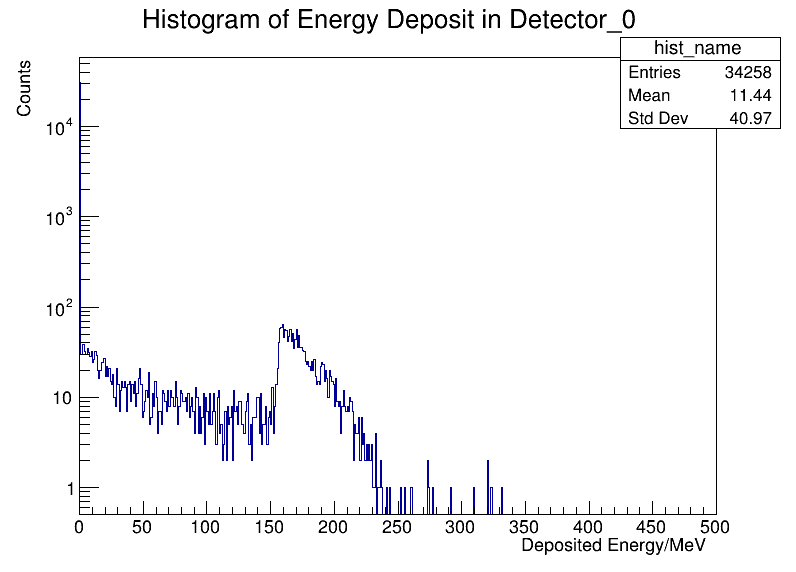

In [24]:

import time

if 'Detector_0' in data:
    # Obtener los valores de energía depositada en 'Detector_0'
    detector_0_data = data['Detector_0']
    energy_deposits = detector_0_data['EnergyDeposit']

    # Crear el histograma con PyROOT
    canvas_name = f"canvas_{time.time()}"
    canvas = ROOT.TCanvas("canvas_name", "Histogram", 800, 600)
    hist_name = f"HistoDepositedEnergy_{time.time()}"
    hist = ROOT.TH1F("hist_name", "Histogram of Energy Deposit in Detector_0", 500, 0, 500)
    for energy_deposit in energy_deposits:
        hist.Fill(energy_deposit)

    # Aplicar escala logarítmica al eje Y
    canvas.SetLogy()
    # Colocar nombre a los ejes x e y
    hist.GetXaxis().SetTitle("Deposited Energy/MeV")
    hist.GetYaxis().SetTitle("Counts")

    # Guardar el histograma en un archivo .root
    output_file = ROOT.TFile("histogram.root", "RECREATE")
    hist.Write()
    output_file.Close()

    # Mostrar el histograma en el canvas
    hist.Draw()
    canvas.Update()
    canvas.Draw()
else:
    print("'Detector_0' no está presente en el archivo JSON.")
